In [270]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import scipy.stats as stats

In [226]:
import warnings
warnings.filterwarnings('ignore')

In [227]:
# reading the dataset
data=pd.read_csv('mushrooms.csv')

# Data Inspection

In [228]:
# Displaying first 5 rows
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [229]:
# Displaying last 5 rows
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [230]:
# Checking the size of the dataset
data.shape

(8124, 23)

In [231]:
# check the statistics of the data
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [232]:
# Checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [233]:
# Check for the data type of the features
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

# Data Cleaning & Pre Processing

In [234]:
# Checking the null valuse present in the dataset
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Insight: No null values present in the dataset

In [235]:
# Outlier Detection & Handling
# Since it has all categorical features, no need to check the outliers

# Exploratory Data Analysis

		Habitat vs Edibility


<AxesSubplot:xlabel='habitat'>

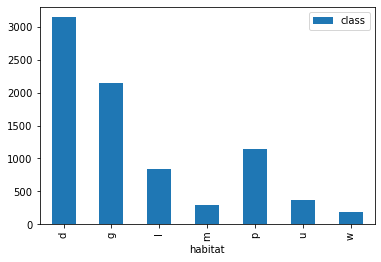

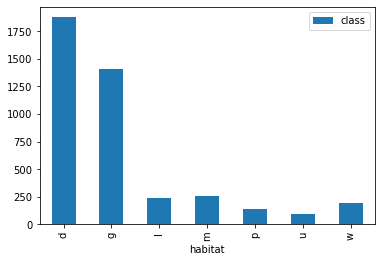

In [236]:
print("\t\tHabitat vs Edibility")
pd.pivot_table(index="habitat",values="class",data=data,aggfunc='count').plot(kind='bar')
data_pass=data[data["class"]=="e"]
pd.pivot_table(index="habitat",values="class",data=data_pass,aggfunc='count').plot(kind='bar')

Insight: </br>
    1. Mushroom that grow in the Waste habitat are edible</br>
    2. Most of the musroom found in meadows are also edible</br>

		Cap color vs poisonous


<AxesSubplot:xlabel='cap-color'>

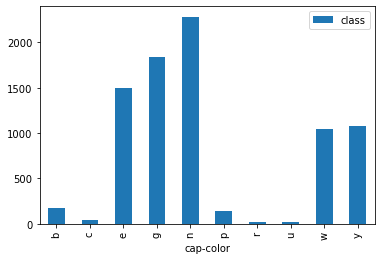

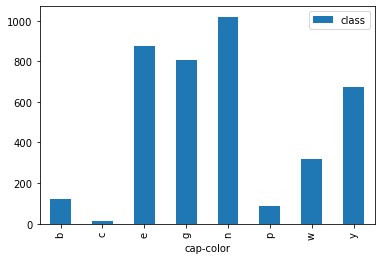

In [237]:
data_pois=data[data["class"]=="p"]
print("\t\tCap color vs poisonous")
pd.pivot_table(index="cap-color",values="class",data=data,aggfunc='count').plot(kind='bar')
pd.pivot_table(index="cap-color",values="class",data=data_pois,aggfunc='count').plot(kind='bar')

Insight: </br>
    1. Mushroom having cap-color purple & green are found completely edible</br>
    2. 70% mushroom with Cap color buff are poisoness</br>

Text(0.5, 1.0, "Mushrooms having odour 'musty' is very rare ")

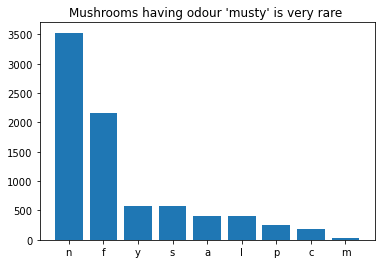

In [238]:
odour_data=data['odor'].value_counts()
name=odour_data.index
plt.bar(name,odour_data)
plt.title("Mushrooms having odour 'musty' is very rare ")

# Encoding of Data

In [239]:
cols=data.columns
cols

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [240]:
# Checking the uniques values of the dataset
arr={}
for i in enumerate(cols):
    arr[i[0]]=data[i[1]].unique()
arr

{0: array(['p', 'e'], dtype=object),
 1: array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object),
 2: array(['s', 'y', 'f', 'g'], dtype=object),
 3: array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object),
 4: array(['t', 'f'], dtype=object),
 5: array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object),
 6: array(['f', 'a'], dtype=object),
 7: array(['c', 'w'], dtype=object),
 8: array(['n', 'b'], dtype=object),
 9: array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
       dtype=object),
 10: array(['e', 't'], dtype=object),
 11: array(['e', 'c', 'b', 'r', '?'], dtype=object),
 12: array(['s', 'f', 'k', 'y'], dtype=object),
 13: array(['s', 'f', 'y', 'k'], dtype=object),
 14: array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object),
 15: array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], dtype=object),
 16: array(['p'], dtype=object),
 17: array(['w', 'n', 'o', 'y'], dtype=object),
 18: array(['o', 't', 'n'], dtype=object),
 19: array(

Insight:
    Column 11 contains '?', so need to check further

In [241]:
data.iloc[:,11].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [242]:
#  we 2480 entries of "?" in column11, so we cannot go for drop method. so we will impute using mode function

In [243]:
# Taking the idexes of the rows having "?"
arr=data[data.iloc[:,11]=='?'].index.to_numpy()

In [244]:
#arr=[3984,4023,4076,4100,4104,4196,4200,4283,4291,4326,4329,4331,4357,4376,4380,4396,4419,4429,4459,4461,4494,4497,4498,4519,4522,4533,4534,4557,4610,4611,4647,4662,4663,4673,4717,4722,4777,4801,4806,4812,4814,4817,4824,4826,4831,4844,4846,4858,4859,4860,4869,4871,4884,4888,4898,4899,4903,4904,4911,4926,4931,4938,4939,4945,4946,4951,4964,4965,4966,4984,4986,4993,4996,4999,5001,5005,5010,5015,5023,5041,5051,5052,5053,5070,5071,5074,5085,5098,5101,5104,5105,5106,5113,5116,5131,5132,5133,5134,5135,5141,5142,5144,5145,5147,5149,5150,5151,5154,5155,5160,5162,5163,5166,5168,5169,5175,5176,5179,5186,5188,5192,5193,5194,5197,5202,5205,5206,5208,5210,5212,5216,5218,5219,5221,5223,5224,5226,5227,5229,5230,5233,5239,5241,5243,5245,5252,5257,5259,5262,5264,5265,5266,5267,5269,5271,5274,5277,5280,5283,5284,5285,5287,5291,5292,5295,5297,5302,5304,5305,5306,5308,5309,5310,5311,5312,5313,5316,5321,5324,5325,5326,5328,5332,5337,5340,5342,5346,5351,5354,5360,5361,5362,5365,5371,5375,5378,5379,5382,5385,5387,5389,5390,5392,5394,5398,5402,5404,5411,5413,5415,5416,5417,5420,5421,5430,5432,5436,5440,5441,5443,5446,5448,5461,5463,5465,5466,5469,5471,5473,5479,5481,5483,5487,5489,5492,5497,5501,5502,5503,5504,5507,5511,5513,5514,5515,5517,5519,5521,5525,5528,5529,5530,5533,5534,5535,5536,5537,5538,5540,5544,5549,5551,5553,5554,5556,5557,5558,5559,5562,5563,5569,5570,5573,5576,5579,5581,5583,5585,5586,5588,5589,5590,5594,5595,5596,5599,5600,5602,5603,5604,5606,5612,5614,5615,5619,5622,5623,5624,5628,5634,5638,5640,5641,5644,5645,5649,5652,5653,5659,5661,5668,5669,5673,5674,5679,5680,5681,5682,5683,5686,5690,5691,5692,5694,5695,5697,5698,5704,5709,5711,5713,5714,5715,5719,5720,5721,5722,5724,5731,5732,5733,5734,5736,5737,5741,5743,5745,5754,5755,5757,5758,5761,5764,5767,5768,5769,5770,5771,5773,5777,5779,5780,5781,5783,5787,5790,5799,5800,5801,5807,5810,5815,5816,5817,5819,5820,5823,5826,5828,5831,5834,5835,5836,5837,5839,5847,5849,5850,5854,5858,5859,5860,5861,5863,5864,5865,5868,5869,5871,5872,5874,5875,5878,5883,5884,5886,5891,5893,5894,5895,5898,5900,5906,5907,5913,5914,5916,5917,5928,5930,5931,5932,5933,5935,5937,5938,5939,5944,5948,5953,5955,5956,5960,5961,5964,5966,5970,5971,5973,5976,5980,5985,5989,5991,5994,5995,5996,5997,6000,6001,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074,6075,6076,6077,6078,6079,6080,6081,6082,6083,6084,6085,6086,6087,6088,6089,6090,6091,6092,6093,6094,6095,6096,6097,6098,6099,6100,6101,6102,6103,6104,6105,6106,6107,6108,6109,6110,6111,6112,6113,6114,6115,6116,6117,6118,6119,6121,6122,6123,6124,6125,6126,6127,6128,6129,6130,6131,6132,6133,6134,6135,6136,6137,6138,6139,6140,6141,6142,6143,6144,6145,6146,6147,6148,6149,6150,6151,6152,6153,6154,6155,6156,6157,6158,6159,6160,6161,6162,6163,6164,6165,6166,6167,6168,6169,6170,6171,6172,6173,6174,6175,6176,6177,6178,6179,6180,6181,6182,6183,6184,6185,6186,6187,6188,6189,6190,6191,6192,6193,6194,6195,6196,6197,6198,6199,6200,6201,6202,6203,6204,6205,6206,6207,6208,6209,6210,6211,6212,6213,6214,6215,6216,6217,6218,6219,6220,6221,6222,6223,6224,6225,6226,6227,6228,6229,6230,6231,6232,6233,6234,6235,6236,6237,6238,6239,6240,6241,6242,6243,6244,6245,6246,6247,6248,6249,6250,6251,6252,6253,6254,6255,6256,6257,6258,6259,6260,6261,6262,6263,6264,6265,6266,6267,6268,6269,6270,6271,6272,6273,6274,6275,6276,6277,6278,6279,6280,6281,6282,6283,6284,6285,6286,6287,6288,6289,6290,6291,6292,6293,6294,6295,6296,6297,6298,6299,6300,6301,6302,6303,6304,6305,6306,6307,6308,6309,6310,6311,6312,6313,6314,6315,6316,6317,6318,6319,6320,6321,6322,6323,6324,6325,6326,6327,6328,6329,6330,6331,6332,6333,6334,6335,6336,6337,6338,6339,6340,6341,6342,6343,6344,6345,6346,6347,6348,6349,6350,6351,6352,6353,6354,6355,6356,6357,6358,6359,6360,6361,6362,6363,6364,6365,6366,6367,6368,6369,6370,6371,6372,6373,6374,6375,6376,6377,6378,6379,6380,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399,6400,6401,6402,6403,6404,6405,6406,6407,6408,6409,6410,6411,6412,6413,6414,6416,6417,6418,6419,6420,6421,6422,6423,6424,6425,6426,6427,6428,6429,6430,6431,6432,6433,6434,6435,6436,6437,6438,6439,6440,6441,6442,6443,6444,6445,6446,6447,6448,6449,6450,6451,6452,6453,6454,6455,6456,6457,6458,6459,6460,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499,6500,6501,6502,6503,6504,6505,6506,6507,6508,6509,6510,6511,6512,6513,6514,6515,6516,6517,6518,6519,6520,6521,6522,6523,6524,6525,6526,6527,6528,6529,6530,6531,6532,6533,6534,6535,6536,6537,6538,6539,6540,6541,6542,6543,6544,6545,6546,6547,6548,6549,6550,6551,6552,6553,6554,6555,6556,6557,6558,6559,6560,6561,6562,6563,6564,6565,6566,6567,6568,6569,6570,6571,6572,6573,6574,6575,6576,6577,6578,6579,6580,6581,6582,6583,6584,6585,6586,6587,6588,6589,6590,6591,6592,6593,6594,6595,6596,6597,6598,6599,6600,6601,6602,6603,6604,6605,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615,6616,6617,6618,6619,6620,6621,6622,6623,6624,6625,6626,6627,6628,6629,6630,6631,6632,6633,6634,6635,6636,6637,6638,6639,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649,6650,6651,6652,6653,6654,6655,6656,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666,6667,6669,6670,6671,6672,6673,6674,6675,6676,6677,6678,6679,6680,6681,6682,6683,6684,6685,6686,6687,6688,6689,6690,6691,6692,6693,6694,6695,6696,6697,6698,6699,6700,6701,6702,6703,6704,6705,6706,6707,6708,6709,6710,6711,6712,6713,6714,6715,6716,6717,6718,6719,6720,6721,6722,6723,6724,6725,6726,6727,6728,6729,6730,6731,6732,6733,6734,6735,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6833,6834,6835,6836,6837,6838,6839,6840,6841,6842,6843,6844,6845,6846,6847,6848,6849,6850,6851,6852,6853,6854,6856,6857,6858,6859,6860,6861,6862,6863,6864,6865,6866,6867,6868,6869,6870,6871,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6905,6906,6907,6908,6909,6910,6911,6913,6914,6915,6916,6917,6918,6919,6920,6921,6922,6923,6924,6925,6926,6927,6929,6930,6931,6932,6933,6934,6935,6936,6937,6938,6939,6940,6942,6943,6944,6946,6947,6948,6949,6950,6951,6952,6953,6954,6955,6956,6957,6958,6959,6960,6961,6962,6963,6964,6965,6966,6968,6969,6971,6972,6973,6974,6975,6976,6977,6978,6979,6980,6981,6982,6983,6985,6986,6987,6988,6989,6990,6992,6993,6994,6995,6996,6997,6998,6999,7000,7001,7002,7003,7004,7005,7006,7007,7008,7009,7010,7011,7012,7013,7014,7015,7016,7017,7018,7019,7020,7021,7023,7024,7025,7026,7027,7028,7029,7030,7031,7032,7033,7035,7036,7037,7038,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048,7049,7050,7051,7052,7053,7054,7055,7056,7057,7058,7059,7060,7061,7062,7064,7066,7067,7068,7069,7070,7071,7072,7074,7075,7076,7077,7078,7079,7080,7081,7082,7083,7084,7085,7086,7087,7088,7089,7090,7092,7093,7094,7095,7096,7097,7098,7099,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7112,7113,7114,7115,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129,7130,7131,7132,7133,7134,7135,7136,7137,7138,7139,7140,7141,7142,7143,7144,7145,7147,7148,7149,7150,7151,7152,7153,7154,7155,7156,7157,7158,7159,7160,7161,7162,7163,7164,7165,7167,7168,7169,7170,7171,7172,7173,7174,7175,7176,7177,7178,7179,7180,7182,7183,7184,7185,7186,7187,7188,7189,7190,7191,7192,7193,7194,7196,7197,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214,7215,7216,7217,7218,7219,7220,7221,7222,7223,7224,7225,7226,7227,7228,7229,7231,7232,7233,7234,7235,7236,7237,7238,7239,7240,7241,7242,7243,7244,7245,7246,7247,7248,7249,7250,7251,7252,7253,7254,7255,7256,7257,7258,7259,7260,7261,7262,7263,7264,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275,7276,7277,7278,7279,7280,7281,7282,7283,7284,7286,7287,7288,7289,7290,7291,7293,7294,7296,7297,7298,7299,7301,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7324,7325,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7337,7338,7339,7340,7341,7343,7344,7345,7346,7347,7348,7349,7350,7351,7352,7354,7355,7356,7357,7358,7359,7361,7362,7363,7364,7365,7366,7369,7371,7372,7373,7374,7375,7376,7378,7379,7380,7381,7382,7383,7384,7385,7387,7388,7389,7390,7391,7392,7393,7394,7395,7396,7397,7398,7399,7400,7402,7403,7404,7405,7406,7407,7408,7409,7410,7411,7412,7413,7414,7416,7417,7418,7419,7420,7421,7423,7424,7425,7426,7427,7428,7429,7430,7431,7432,7433,7434,7435,7436,7437,7438,7439,7440,7441,7442,7444,7445,7446,7447,7448,7450,7451,7452,7453,7454,7455,7456,7457,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7482,7484,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500,7501,7502,7503,7504,7505,7506,7507,7508,7509,7510,7511,7512,7513,7514,7515,7516,7517,7518,7519,7520,7521,7522,7523,7524,7525,7526,7527,7528,7529,7530,7531,7532,7534,7535,7537,7538,7539,7540,7541,7542,7543,7544,7545,7546,7547,7549,7550,7551,7552,7553,7554,7555,7556,7557,7558,7559,7560,7561,7562,7563,7564,7565,7566,7567,7568,7569,7571,7572,7573,7574,7575,7576,7577,7578,7579,7580,7581,7582,7583,7584,7585,7586,7587,7588,7589,7590,7591,7592,7593,7594,7595,7596,7598,7599,7601,7603,7604,7605,7606,7607,7608,7609,7610,7611,7612,7613,7614,7615,7616,7617,7618,7619,7620,7621,7622,7623,7624,7625,7626,7627,7628,7629,7630,7631,7632,7633,7634,7636,7637,7638,7639,7640,7641,7642,7643,7644,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654,7655,7656,7657,7658,7659,7660,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670,7671,7672,7674,7675,7676,7677,7678,7679,7680,7681,7682,7683,7684,7685,7686,7687,7688,7689,7690,7691,7692,7693,7694,7695,7696,7697,7698,7699,7700,7701,7703,7707,7708,7710,7711,7712,7713,7715,7716,7718,7719,7720,7722,7723,7724,7725,7726,7728,7729,7730,7731,7732,7733,7734,7735,7736,7737,7738,7740,7741,7742,7743,7744,7745,7746,7747,7748,7749,7750,7751,7752,7753,7754,7755,7756,7757,7758,7759,7760,7761,7762,7763,7764,7765,7766,7767,7768,7769,7770,7771,7772,7773,7774,7775,7776,7777,7778,7780,7781,7782,7783,7784,7785,7786,7787,7788,7789,7790,7791,7792,7793,7794,7795,7796,7797,7798,7799,7800,7802,7803,7804,7806,7807,7808,7809,7810,7811,7812,7813,7814,7815,7816,7817,7818,7819,7821,7822,7823,7824,7825,7826,7827,7828,7829,7830,7831,7832,7833,7834,7835,7836,7837,7838,7839,7840,7841,7842,7843,7844,7845,7846,7847,7848,7849,7850,7851,7852,7853,7854,7855,7856,7857,7858,7859,7860,7861,7862,7863,7864,7865,7866,7867,7868,7869,7870,7871,7872,7873,7874,7875,7876,7877,7878,7879,7880,7881,7882,7883,7884,7885,7886,7888,7889,7890,7891,7892,7893,7894,7895,7896,7897,7899,7900,7901,7902,7903,7904,7905,7906,7907,7908,7909,7911,7912,7913,7914,7915,7916,7917,7918,7920,7921,7922,7923,7924,7925,7926,7927,7928,7929,7930,7932,7933,7934,7935,7936,7937,7938,7939,7942,7943,7944,7945,7947,7948,7949,7950,7951,7953,7954,7955,7956,7957,7958,7959,7960,7961,7962,7963,7964,7966,7967,7968,7969,7970,7971,7972,7973,7974,7975,7976,7977,7978,7979,7980,7982,7983,7985,7987,7988,7989,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999,8000,8002,8003,8004,8005,8006,8007,8008,8009,8010,8011,8012,8013,8014,8015,8016,8017,8018,8019,8020,8021,8022,8023,8024,8025,8026,8027,8028,8029,8030,8031,8032,8033,8034,8035,8036,8037,8039,8040,8041,8042,8043,8044,8045,8046,8047,8048,8049,8050,8051,8052,8053,8054,8055,8056,8057,8058,8059,8060,8061,8062,8063,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8096,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106,8107,8108,8109,8110,8111,8112,8113,8115,8116,8117,8118,8119,8120,8121,8122,8123]
# Replacing it with Mode value of theat column
mode_val=data["stalk-root"].mode()[0]
for i in arr:
    data.iloc[i,11]=mode_val

In [245]:
data.iloc[:,11].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [246]:
# Encoding of the data
#Impoting Necessary Libraries
from sklearn.preprocessing import LabelEncoder

In [247]:
# y=data.iloc[:,0]
# x=data.drop("class", axis=1)
lbl=LabelEncoder()
for i in cols:
    data[i]=lbl.fit_transform(data[i])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1


# Feature Reduction

<AxesSubplot:>

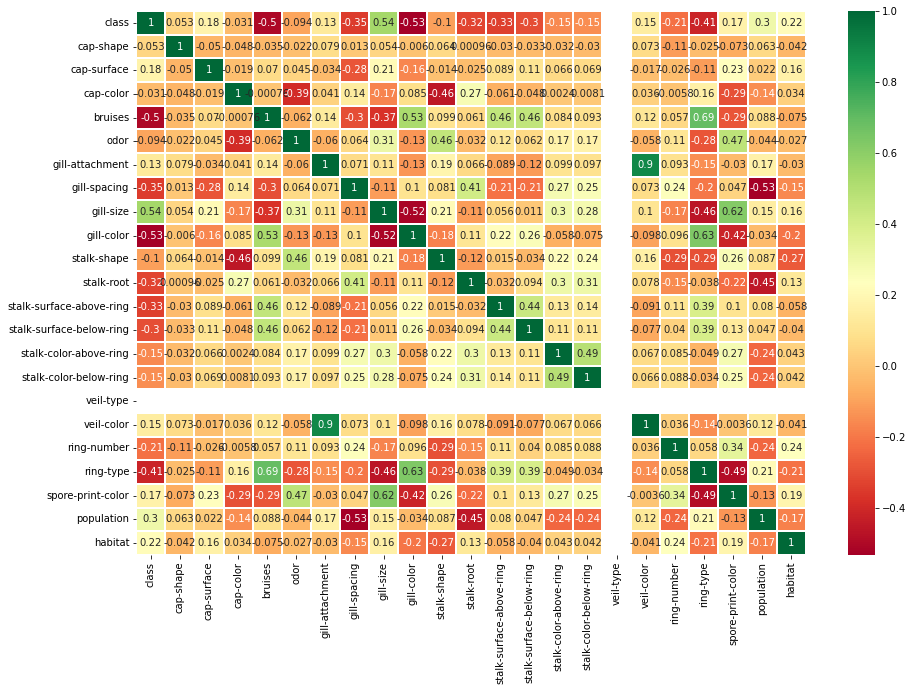

In [248]:
# Checking the correlation of the Features
corr=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,linewidths=0.2,cmap='RdYlGn',annot=True)

In [249]:
#column veil-type has a single value, and highly positivly correlated to gill-attachment.
# so we can drop that column
data.drop('veil-type',axis=1,inplace=True)

In [250]:
data.shape

(8124, 22)

In [251]:
#Splitting Data into dependant & Independent variables
y=data.iloc[:,0]
x=data.drop("class", axis=1)
# Splitting data into train & test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(6499, 21)

In [252]:
x_test.shape

(1625, 21)

# Feature Scaling

In [253]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

# Feature Selection

In [254]:
rdm=RandomForestClassifier()
rdm.fit(x_train,y_train)
feat_importances=pd.Series(rdm.feature_importances_,index=x.columns).sort_values(ascending=False)*100

			Top 10 Best Features


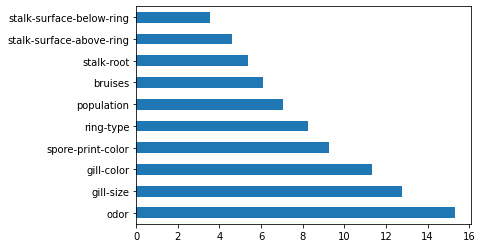

In [255]:
#We can drop columns with Low Feature importance
print("\t\t\tTop 10 Best Features")
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [257]:
cols=x.columns

In [258]:
# Remove the all other columns from the dataset

feat_importances.nlargest(10).index
new_feature=['odor', 'gill-size', 'spore-print-color', 'gill-color',
       'stalk-surface-below-ring', 'ring-type', 'population', 'bruises',
       'stalk-surface-above-ring', 'stalk-root']

for k in cols:
    if k not in new_feature:
        x.drop(k,axis=1,inplace=True)

In [259]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Modeling

Text(0.5, 1.0, 'Accuracy for differnet K value')

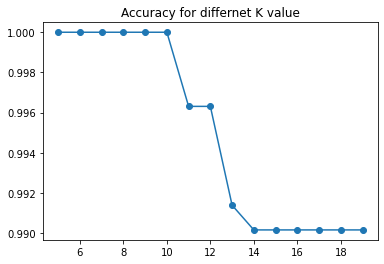

In [260]:
# Finding the best vaue of n_neighbors in KNN
n_nghbr=[]
lim=np.arange(5,20)

for i in lim:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accur=accuracy_score(y_test,y_pred)
    n_nghbr.append(accur)
plt.plot(lim,n_nghbr,'-o')
plt.title("Accuracy for differnet K value")

we can choose n_neighbors for KNN as 6

In [271]:
# since its is Classification data, We can gor for Classifier algorithms
Model={
    'Logistic Regression':LogisticRegression(),
    'KNN Classifier':KNeighborsClassifier(n_neighbors=6, metric="minkowski"),
    'Random Forest Classifier':RandomForestClassifier(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Gradient Boosting Classifier':GradientBoostingClassifier(),
    'support vector': SVC(),
    'BernoulliNB':BernoulliNB()   
}

In [272]:
result={}

for name,model in Model.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    result[name]=acc

In [273]:
result

{'Logistic Regression': 0.908923076923077,
 'KNN Classifier': 1.0,
 'Random Forest Classifier': 1.0,
 'Decision Tree Classifier': 1.0,
 'Gradient Boosting Classifier': 1.0,
 'support vector': 0.9827692307692307,
 'BernoulliNB': 0.7138461538461538}

Output:</br>
    1. From the accuracy score, we can conclude that Support Vector, Logistic are Best models for this dataset

In [274]:
x.columns

Index(['bruises', 'odor', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type',
       'spore-print-color', 'population'],
      dtype='object')